# Linear Regression Using Gradient Descent

Assuming the following formula can predict something meaningful (eg. such as a house price):<br>
$\begin{align}y = 2x - 3z + 5\end{align}$

If we only know the label (i.e. "y") and the inputs x and z. How can we identify the weights and bias (2, 3 and 5)?<br>

In this notebook we want identify the weights and biases of the formula, using the gradient descent optimisation algorithm. To do this, we will:
* Generate random sample data
* Generate targets using the formula, plus some noise
* Initialize some variables to that we will slowly update to approximate the weights and formulas from our formula
* Run gradient descent
* Verify the result

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#### Generate random sample data

In [28]:
# generate random observations of X feature with Z weight
observations = 1000
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))
inputs = np.column_stack((xs,zs))

print('rows,cols:', inputs.shape)

rows,cols: (1000, 2)


#### Generate associated targets

In [29]:
# genereate a target, based on a preselected formula.
noise = np.random.uniform(-1, 1, (observations,1))
targets = 2*xs - 3*zs + 5 + noise
print('rows,cols:', targets.shape)

rows,cols: (1000, 1)


#### Plot the training data
The point is to see that there is a strong trend that our model should learn to reproduce.

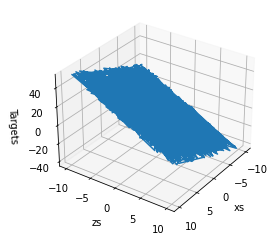

In [30]:
# reshape for plotting
xs = xs.reshape(observations,)
zs = zs.reshape(observations,)
targets = targets.reshape(observations,)

# setup 3d plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs, zs, targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim=35)
plt.show()

# reshape ndarrays back
xs = xs.reshape(observations,1)
zs = zs.reshape(observations,1)
targets = targets.reshape(observations,1)

### Initialize variables for the weights and biases (we want to optimise)

In [35]:
init_range = 0.1
weights = np.random.uniform(low=-init_range, high=init_range, size=(2, 1))
biases = np.random.uniform(low=-init_range, high=init_range, size=1)

print('weights:', weights.tolist())
print('biases:', biases.tolist())

weights: [[-0.04887581334766318], [0.08852836012596946]]
biases: [0.08281219720680197]


### Train the model

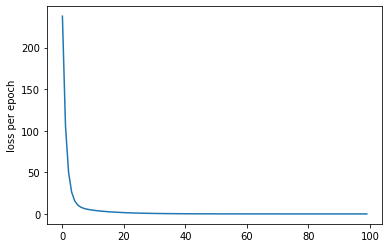

In [36]:
learning_rate = 0.05
lossarr = []

for i in range (100):
    
    # new prediction
    outputs = np.dot(inputs,weights) + biases
    
    # check how good it was and quantify 
    deltas = outputs - targets
    loss = np.sum(deltas ** 2) / 2 / observations
    lossarr.append(loss)
    deltas_scaled = deltas / observations
    
    # update weights and biases
    weights = weights - learning_rate * np.dot(inputs.T,deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)
    
# plot the loss over time
plt.plot(lossarr)
plt.ylabel('loss per epoch')
plt.show()

### Print weights and biases and see if we have worked correctly.

In [50]:
print('weights to predict:', 2, -3)
print('optimised weights', weights[0], weights[1])

print('bias to predict:', 5)
print('optimised bias:', biases.tolist())

weights to predict: 2 -3
optimised weights [1.99980535] [-3.0031071]
bias to predict: 5
optimised bias: [4.983495634319664]
